<a href="https://colab.research.google.com/github/OlajideFemi/OlajideFemi.github.io/blob/index/Dissertation_Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import Library
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import json
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


<center><h1> West Midlands' Carbon Footprint </h1></center>

### Understanding the Data

<!-- <ul> -->
<!--  <li><h2> Understanding the Data</h2></li> -->
<!--  <li>Handling Missing Values</li> -->
<!--  <li>Remove Duplicates</li> -->
<!--  <li>Standardize Formats</li> -->
<!--  <li>Handle Outliers</li> -->
<!--  <li>Validate and correct data</li>  -->
<!--  <li>Document Changes</li> -->
<!--  <li>Test and iterate</li> -->
<!--  <li>Maintain data provence</li>   -->     
<!-- </ul> -->




<!-- <P><a href="https://www.gov.uk/government/statistics/uks-carbon-footprint">https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
</a></P> -->  

<b><P>Dataset:</b></P>
<p>
C. O'Sullivan, "UK local authority and regional greenhouse gas emissions national statistics: 2005-2021," Department of Business, Energy & Industrial Strategy, London, 2023.</p>
Accessed Date: 29 March, 2023
<P><b>Internet Repositories:</b></P>

<P><a href="https://www.gov.uk/government/statistics/uks-carbon-footprint">https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166194/2005-21-uk-local-authority-ghg-emissions.xlsx'
</a></P>



<b><P>Stored On:</b></P>

<P>https://olajidefemi.github.io</P>

<P><a href="GitHub">https://raw.githubusercontent.com//OlajideFemi/OlajideFemi.github.io/index/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx
</a></P>


From exploration of the '1_1' sheet

 <p>Shape of the Data: The dataset contains 7106 rows and 50 columns.</p>
 <p>Summary of the Data:
   The dataset provides details for <b>12 unique regions</b>.
   There are data for 17 unique years, spanning from 2005 to 2021.
   Variables such as 'Industry Electricity', 'Industry Gas', and 'Industry Total'</p>





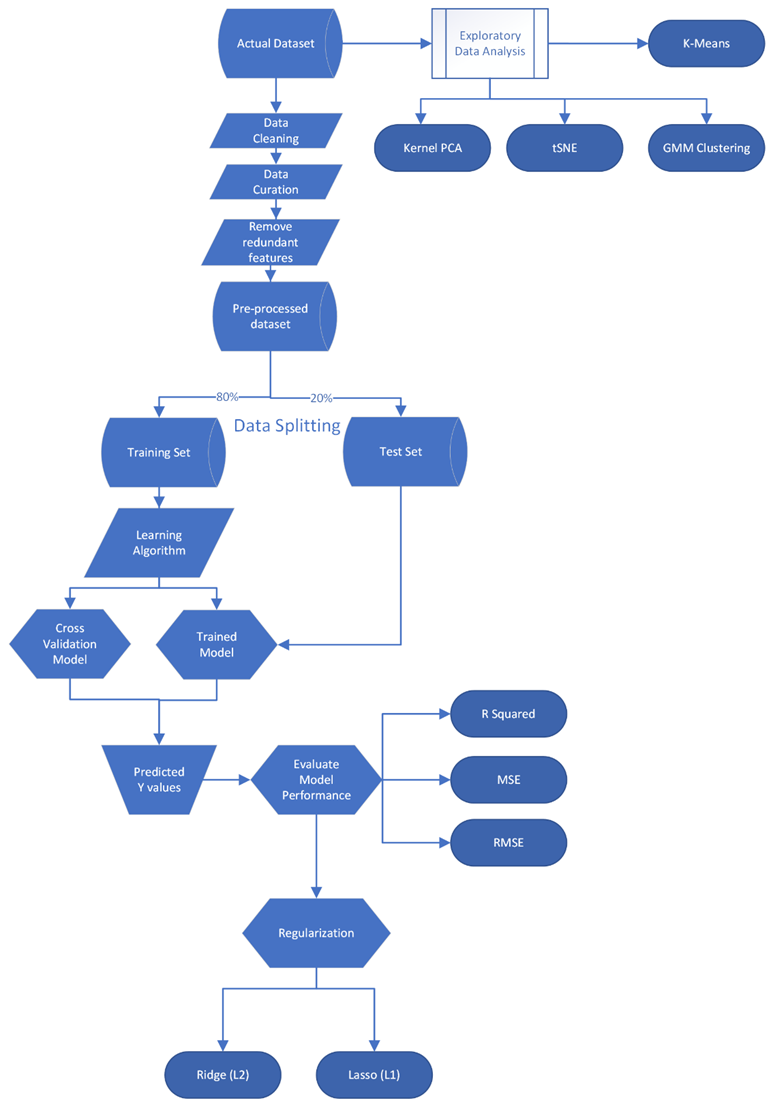

In [2]:
#Load the excel data on sheet 1_1
url = 'https://raw.githubusercontent.com//OlajideFemi/OlajideFemi.github.io/index/2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx'
data_1_1 = pd.read_excel(url, sheet_name='1_1')
data_1_1.head()


,Table 1.1: Local Authority territorial greenhouse gas emissions estimates 2005-2021 (kt CO2e) - Full dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,This worksheet contains one table. The table c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Freeze panes are active on this sheet. To turn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Filters are active in cells A5 to AX5 and may ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
4,North East,Darlington,Darlington,E06000005,2005,51.87311,114.701874,0.045681,43.073543,209.694209,...,12.699185,63.7069,34.256022,5.613394,39.869415,968.661604,100.287,9.658895,197.4758,4.905217


In [3]:
# Extract the actual data, excluding the header information
data_1_1_actual = data_1_1.iloc[4:]

# Set the column names from the header row
data_1_1_actual.columns = data_1_1.iloc[3]

In [4]:
data_1_1_actual

3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
4,North East,Darlington,Darlington,E06000005,2005,51.87311,114.701874,0.045681,43.073543,209.694209,...,12.699185,63.7069,34.256022,5.613394,39.869415,968.661604,100.287,9.658895,197.4758,4.905217
5,North East,Darlington,Darlington,E06000005,2006,55.398988,97.614091,0.065836,42.086928,195.165842,...,11.659759,59.927177,31.802024,6.57408,38.376104,943.627506,101.509,9.295998,197.4758,4.778446
6,North East,Darlington,Darlington,E06000005,2007,52.249398,95.167732,0.074503,43.79521,191.286843,...,12.166507,59.716732,37.048534,6.81813,43.866664,925.275164,102.632,9.015465,197.4758,4.685512
7,North East,Darlington,Darlington,E06000005,2008,51.651166,95.266031,0.055964,35.982972,182.956132,...,12.55795,59.566044,7.662955,6.771385,14.43434,876.045542,103.694,8.448373,197.4758,4.436217
8,North East,Darlington,Darlington,E06000005,2009,45.607413,82.045964,1.061014,26.863721,155.578112,...,11.405542,57.689627,16.001037,6.053694,22.054731,805.592471,104.355,7.71973,197.4758,4.079449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,National Total,National Total,National Total,NaN,2017,18256.184881,15602.265158,33619.941766,17990.618473,85469.010278,...,9689.245642,51301.203756,15821.005923,5131.240623,20952.246546,437824.383087,66067.257699,6.62695,248717.5706,1.760328
7106,National Total,National Total,National Total,NaN,2018,20997.236163,19161.407779,32309.811618,17713.459471,90181.915031,...,9573.565596,51380.522611,15911.984565,5088.278772,21000.263337,430745.509283,66371.006647,6.489965,248717.5706,1.731866
7107,National Total,National Total,National Total,NaN,2019,18512.578663,18433.106892,31951.4012,17364.788398,86261.875153,...,9770.415392,50706.546836,15684.547926,5035.738233,20720.286159,416856.663324,66769.633181,6.243207,248717.5706,1.676024
7108,National Total,National Total,National Total,NaN,2020,15164.001049,17463.024978,30135.710515,17584.10729,80346.843833,...,8890.946812,49220.899615,14304.397217,4915.16683,19219.564047,376807.810496,67044.605507,5.620255,248717.5706,1.515003


In [5]:
# Reset the index for the actual data
data_1_1_actual = data_1_1_actual.reset_index(drop=True)
data_1_1_actual

3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
0,North East,Darlington,Darlington,E06000005,2005,51.87311,114.701874,0.045681,43.073543,209.694209,...,12.699185,63.7069,34.256022,5.613394,39.869415,968.661604,100.287,9.658895,197.4758,4.905217
1,North East,Darlington,Darlington,E06000005,2006,55.398988,97.614091,0.065836,42.086928,195.165842,...,11.659759,59.927177,31.802024,6.57408,38.376104,943.627506,101.509,9.295998,197.4758,4.778446
2,North East,Darlington,Darlington,E06000005,2007,52.249398,95.167732,0.074503,43.79521,191.286843,...,12.166507,59.716732,37.048534,6.81813,43.866664,925.275164,102.632,9.015465,197.4758,4.685512
3,North East,Darlington,Darlington,E06000005,2008,51.651166,95.266031,0.055964,35.982972,182.956132,...,12.55795,59.566044,7.662955,6.771385,14.43434,876.045542,103.694,8.448373,197.4758,4.436217
4,North East,Darlington,Darlington,E06000005,2009,45.607413,82.045964,1.061014,26.863721,155.578112,...,11.405542,57.689627,16.001037,6.053694,22.054731,805.592471,104.355,7.71973,197.4758,4.079449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,National Total,National Total,National Total,NaN,2017,18256.184881,15602.265158,33619.941766,17990.618473,85469.010278,...,9689.245642,51301.203756,15821.005923,5131.240623,20952.246546,437824.383087,66067.257699,6.62695,248717.5706,1.760328
7102,National Total,National Total,National Total,NaN,2018,20997.236163,19161.407779,32309.811618,17713.459471,90181.915031,...,9573.565596,51380.522611,15911.984565,5088.278772,21000.263337,430745.509283,66371.006647,6.489965,248717.5706,1.731866
7103,National Total,National Total,National Total,NaN,2019,18512.578663,18433.106892,31951.4012,17364.788398,86261.875153,...,9770.415392,50706.546836,15684.547926,5035.738233,20720.286159,416856.663324,66769.633181,6.243207,248717.5706,1.676024
7104,National Total,National Total,National Total,NaN,2020,15164.001049,17463.024978,30135.710515,17584.10729,80346.843833,...,8890.946812,49220.899615,14304.397217,4915.16683,19219.564047,376807.810496,67044.605507,5.620255,248717.5706,1.515003


In [6]:
# Display the shape of the data
data_shape = data_1_1_actual.shape

data_shape

(7106, 50)

In [7]:
# Get a summary of the data
data_summary = data_1_1_actual.describe()

data_summary

3,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
count,7106,7106,7106,6358,7106,7106.00000,7106.0,7106.0,7106.0,7106.000000,...,7106.0,7106.0,7106.0,7106.0,7106.0,7106.000000,7106.0,7106.0,7106.0,7106.0
unique,27,194,418,374,17,7106.00000,7002.0,6118.0,7073.0,7106.000000,...,7073.0,7073.0,7090.0,7073.0,7090.0,7106.000000,7050.0,7073.0,417.0,7073.0
top,South East,Scotland,Darlington,E06000005,2005,51.87311,0.0,0.0,0.0,209.694209,...,0.0,0.0,0.0,0.0,0.0,968.661604,0.0,0.0,0.0,0.0
freq,1190,544,17,17,418,1.00000,105.0,925.0,34.0,1.000000,...,34.0,34.0,17.0,34.0,17.0,1.000000,34.0,34.0,34.0,34.0


In [8]:
# Get a view of the datatypes

data_types = data_1_1_actual.dtypes
data_types

3
Region/Country                            object
Second Tier Authority                     object
Local Authority                           object
Local Authority Code                      object
Calendar Year                             object
Industry Electricity                      object
Industry Gas                              object
Large Industrial Installations            object
Industry 'Other'                          object
Industry Total                            object
Commercial Electricity                    object
Commercial Gas                            object
Commercial 'Other'                        object
Commercial Total                          object
Public Sector Electricity                 object
Public Sector Gas                         object
Public Sector 'Other'                     object
Public Sector Total                       object
Domestic Electricity                      object
Domestic Gas                              object
Domestic 'Other'  

In [9]:
# Check for missing values
missing_values = data_1_1_actual.isnull().sum()

missing_values

3
Region/Country                              0
Second Tier Authority                       0
Local Authority                             0
Local Authority Code                      748
Calendar Year                               0
Industry Electricity                        0
Industry Gas                                0
Large Industrial Installations              0
Industry 'Other'                            0
Industry Total                              0
Commercial Electricity                      0
Commercial Gas                              0
Commercial 'Other'                          0
Commercial Total                            0
Public Sector Electricity                   0
Public Sector Gas                           0
Public Sector 'Other'                       0
Public Sector Total                         0
Domestic Electricity                        0
Domestic Gas                                0
Domestic 'Other'                            0
Domestic Total                  

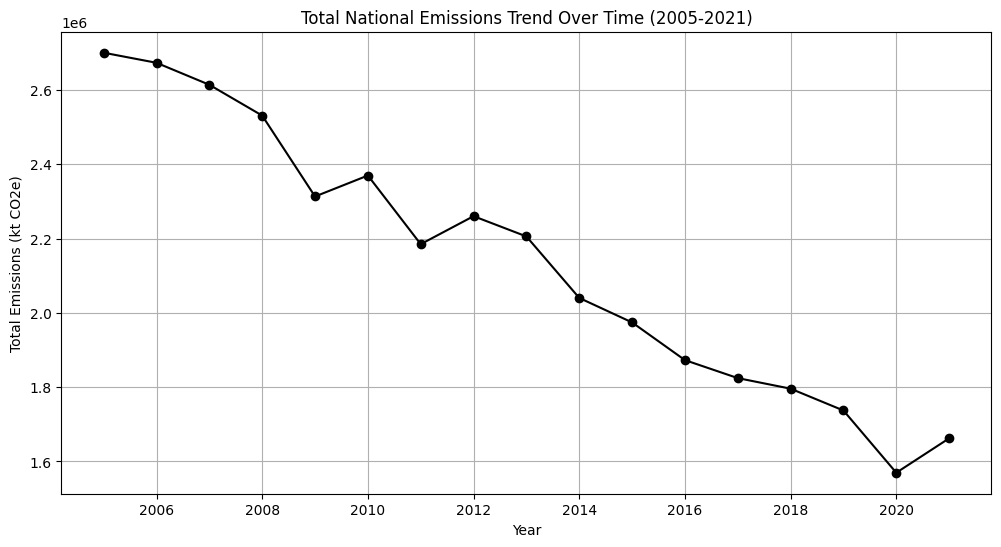

In [10]:
import matplotlib.pyplot as plt

# Group by 'Calendar Year' and sum the 'Grand Total' column to get total emissions for each year
yearly_emissions = data_1_1_actual.groupby('Calendar Year')['Grand Total'].sum()

# Plotting the trend over time
plt.figure(figsize=(12, 6))
yearly_emissions.plot(marker='o', linestyle='-', color='black')
plt.title('Total National Emissions Trend Over Time (2005-2021)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2e)')
plt.grid(True)
plt.show()

In [11]:
# Convert the 'Grand Total' column to a numeric type
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Group by 'Local Authority Region/Country' and sum the 'Grand Total' column to get total emissions for each region again
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
regional_emissions = data_1_1_actual.groupby('Region/Country')['Grand Total'].sum()

# Sort the regional emissions in descending order and get the name of the first region
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
highest_emission_region = regional_emissions.sort_values(ascending=False).index[0]
highest_emission_value = regional_emissions.sort_values(ascending=False).iloc[0]

# Sort the regional emissions in ascending order and get the name of the first region
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
lowest_emission_region = regional_emissions.sort_values(ascending=True).index[0]
lowest_emission_value = regional_emissions.sort_values(ascending=True).iloc[0]

# Results
highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value


('National Total', 8763483.862937795, 'Unallocated', 70997.7272303627)

In [12]:
regional_emissions

Region/Country
East Midlands                     1.246579e+06
East Midlands Total               6.759135e+05
East of England                   1.518514e+06
East of England Total             7.986982e+05
England Total                     6.830838e+06
London                            7.105470e+05
London Total                      7.105470e+05
National Total                    8.763484e+06
North East                        4.513099e+05
North East Total                  4.513099e+05
North West                        1.419484e+06
North West Total                  9.620017e+05
Northern Ireland                  3.910081e+05
Northern Ireland Total            3.910081e+05
Scotland                          8.602071e+05
Scotland Total                    8.602071e+05
South East                        1.713013e+06
South East Total                  1.001996e+06
South West                        1.073928e+06
South West Total                  6.987242e+05
Unallocated                       7.099773e+0

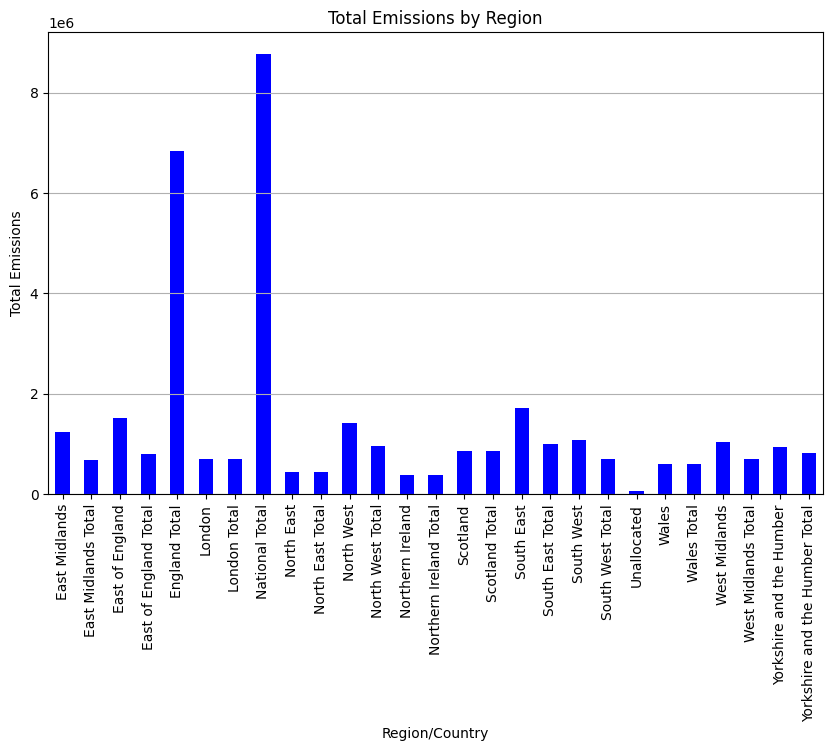

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [14]:
# Drop 'National Total','England Total' and 'Unallocated' from the Series
regional_emissions = regional_emissions.drop(labels=['National Total','England Total', 'Unallocated'])

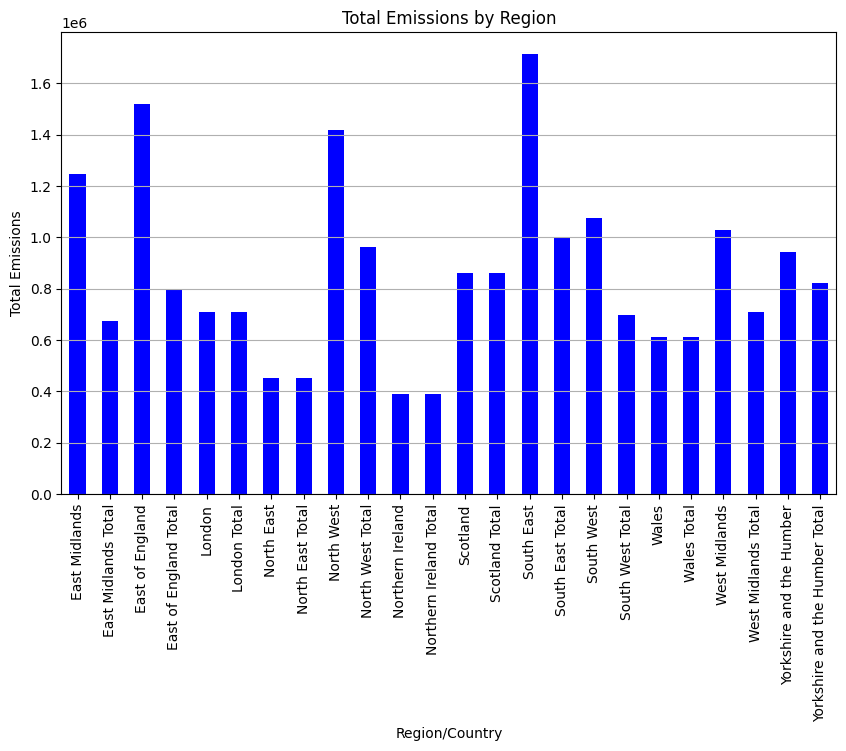

In [15]:
plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [16]:
# Convert the 'Grand Total' column to a numeric type
data_1_1_actual['Grand Total'] = pd.to_numeric(data_1_1_actual['Grand Total'], errors='coerce')

# Filter out rows where 'Region/Country' ends with 'Total' or is 'Unallocated'
data_1_1_filtered = data_1_1_actual[
    ~data_1_1_actual['Region/Country'].str.endswith('Total') &
    ~data_1_1_actual['Region/Country'].str.contains('Unallocated', case=False)
]

# Group by 'Region/Country' and sum the 'Grand Total' column
regional_emissions = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

# Identify the regions with the highest and lowest cumulative emissions
highest_emission_region = regional_emissions.idxmax()
lowest_emission_region = regional_emissions.idxmin()

# Get the corresponding values for the highest and lowest emissions
highest_emission_value = regional_emissions[highest_emission_region]
lowest_emission_value = regional_emissions[lowest_emission_region]

# Output the results
(highest_emission_region, highest_emission_value, lowest_emission_region, lowest_emission_value)

('South East', 1713012.733123874, 'Northern Ireland', 391008.14327239833)

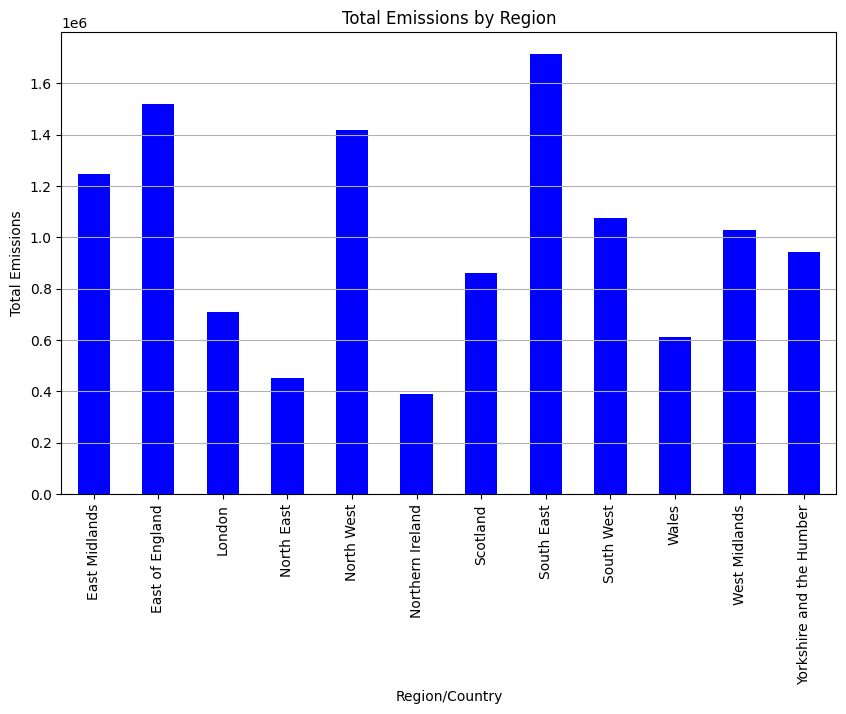

In [17]:
import matplotlib.pyplot as plt

# regional_emissions
# regional_emissions = data_1_1_filtered.groupby('Region/Country')['Grand Total'].sum()

plt.figure(figsize=(10, 6))
regional_emissions.plot(kind='bar', color='blue')
plt.title('Total Emissions by Region')
plt.xlabel('Region/Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [18]:
regional_emissions

Region/Country
East Midlands               1.246579e+06
East of England             1.518514e+06
London                      7.105470e+05
North East                  4.513099e+05
North West                  1.419484e+06
Northern Ireland            3.910081e+05
Scotland                    8.602071e+05
South East                  1.713013e+06
South West                  1.073928e+06
Wales                       6.104329e+05
West Midlands               1.030287e+06
Yorkshire and the Humber    9.443414e+05
Name: Grand Total, dtype: float64

In [19]:
import geopandas as gpd
#file_path = 'uk_regions.geojson'
#file_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/uk_regions.geojson'
#uk_regions_gdf = gpd.read_file(file_path)
#uk_regions_gdf_head = uk_regions_gdf.head()


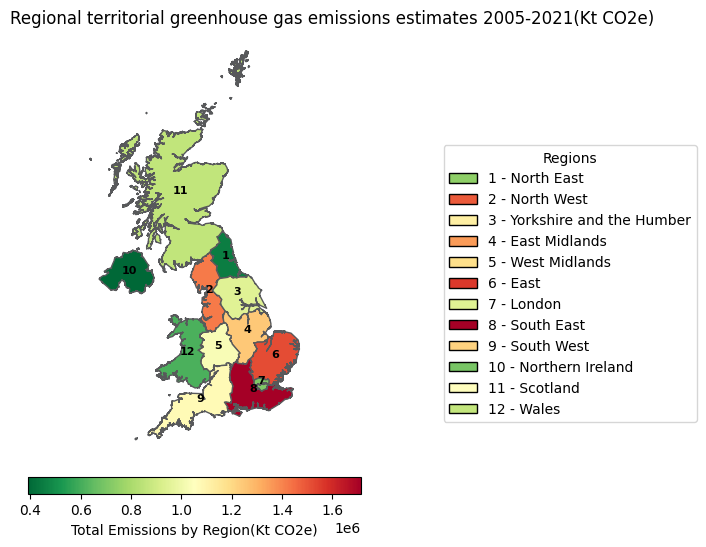

In [34]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

file_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/uk_regions.geojson'

uk_regions_gdf = gpd.read_file(file_path)

#emissions_data = {
#    "Region/Country": [
#        "East Midlands", "East of England", "London", "North East", "North West",
#        "Northern Ireland", "Scotland", "South East", "South West", "Wales",
#        "West Midlands", "Yorkshire and the Humber"
#    ],
#    "Grand Total": [
#        1.246579e+06, 1.518514e+06, 7.105470e+05, 4.513099e+05, 1.419484e+06,
#        3.910081e+05, 8.602071e+05, 1.713013e+06, 1.073928e+06, 6.104329e+05,
#        1.030287e+06, 9.443414e+05
#    ]
#}

emissions_df = regional_emissions.reset_index()
emissions_df.columns = ['Region/Country', 'Grand Total']

#emissions_df = pd.DataFrame(emissions_data)
emissions_df['Region/Country'] = emissions_df['Region/Country'].replace({'East of England': 'East'})

uk_regions_with_emissions = uk_regions_gdf.merge(emissions_df, left_on='rgn19nm', right_on='Region/Country', how='left')

uk_regions_with_emissions['Number'] = range(1, len(uk_regions_with_emissions) + 1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
uk_regions_with_emissions.plot(column='Grand Total', ax=ax, cmap='RdYlGn_r', edgecolor='#58595B')

cmap = plt.cm.RdYlGn_r
norm = mcolors.Normalize(vmin=uk_regions_with_emissions['Grand Total'].min(), vmax=uk_regions_with_emissions['Grand Total'].max())

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Total Emissions by Region(Kt CO2e)')

for idx, row in uk_regions_with_emissions.iterrows():
    plt.annotate(text=str(row['Number']), xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight='bold', color='black', fontsize=8)

legend_elements = [Patch(facecolor=plt.cm.RdYlGn_r(emission / uk_regions_with_emissions['Grand Total'].max()), edgecolor='black',
                         label=f"{number} - {region}") for number, region, emission in zip(uk_regions_with_emissions['Number'],
                         uk_regions_with_emissions['rgn19nm'], uk_regions_with_emissions['Grand Total'])]

ax.legend(handles=legend_elements, title="Regions", bbox_to_anchor=(1.55, 0.75), loc='upper left')

ax.set_title('Regional territorial greenhouse gas emissions estimates 2005-2021(Kt CO2e)', loc='left', position=(-0.3, 1))
plt.axis('off')
plt.show()
